In [1]:
import os
import sys

import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob
from pprint import pprint

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='../../config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses.test import SampleStrongLens
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util
from mejiro.helpers import pyhalo, bkg, color, pandeia_input

In [2]:
oversample_factor = 3
bands = ['F106', 'F129', 'F184']
arrays = []

sample = SampleStrongLens()
for band in bands:
    arrays.append(sample.get_array(num_pix=51 * oversample_factor, side=5.61, band=band))

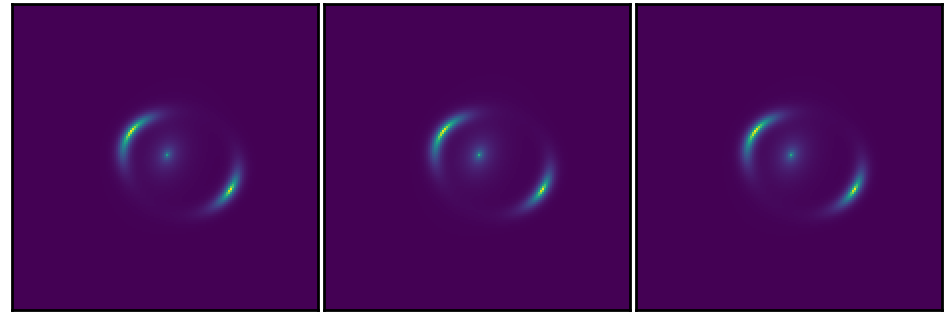

In [10]:
plot.plot_list(arrays)

In [3]:
backgrounds = bkg.get_high_galactic_lat_bkg((51, 51), bands, seed=42)

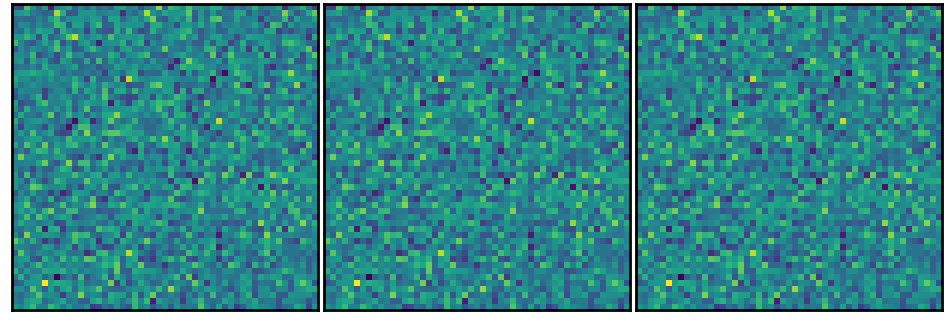

In [4]:
plot.plot_list(backgrounds)

In [5]:
reshaped_bkgs = []

for background in backgrounds:
    reshaped_bkgs.append(util.resize_with_pixels_centered(background, oversample_factor))

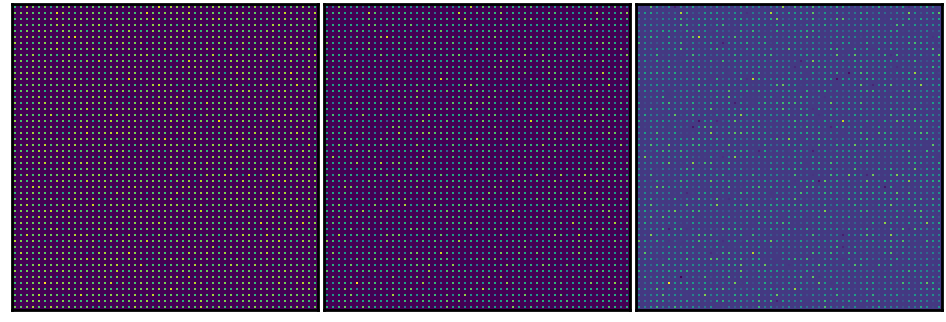

In [6]:
plot.plot_list(reshaped_bkgs)

In [7]:
num_samples = 1000
results = []

for i, band in enumerate(bands):
    calc, _ = pandeia_input.build_pandeia_calc(arrays[i], sample, background=reshaped_bkgs[i], band=band, num_samples=num_samples)
    result, _ = pandeia_input.get_pandeia_image(calc)
    results.append(result)

100%|██████████| 3266/3266 [00:21<00:00, 149.27it/s]


Point source conversion complete: placed 3266 point sources
Estimated calculation time: 0:04:16
Performing Pandeia calculation...
Pandeia calculation complete in 0:04:40


100%|██████████| 3256/3256 [00:20<00:00, 160.04it/s]


Point source conversion complete: placed 3256 point sources
Estimated calculation time: 0:04:16
Performing Pandeia calculation...
Pandeia calculation complete in 0:04:44


100%|██████████| 3264/3264 [00:20<00:00, 158.75it/s]


Point source conversion complete: placed 3264 point sources
Estimated calculation time: 0:04:16
Performing Pandeia calculation...
Pandeia calculation complete in 0:04:25


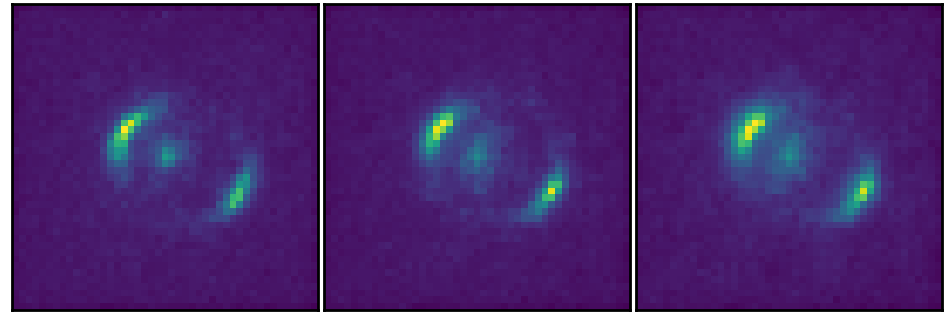

In [8]:
plot.plot_list(results)

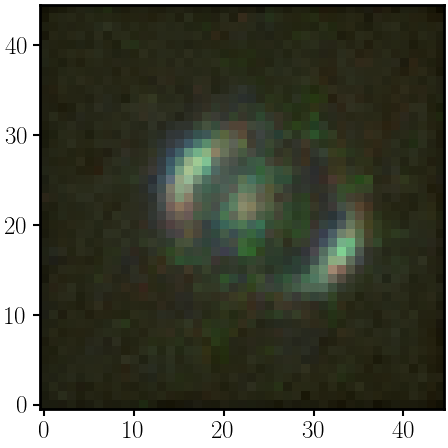

In [9]:
plot.plot(color.get_rgb(results[2], results[1], results[0]))